<a href="https://colab.research.google.com/github/ArvedSe/Logistic-Regression/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Load the dataset
data = pd.read_csv('/content/CreditCard.csv')



In [ ]:
#Print shape, describe the data, and check for missing values
print(data.shape)
print(data.describe())
print(data.isnull().sum())



(1319, 12)
           reports          age       income        share  expenditure  \
count  1319.000000  1319.000000  1319.000000  1319.000000  1319.000000   
mean      0.456406    33.213103     3.365376     0.068732   185.057071   
std       1.345267    10.142783     1.693902     0.094656   272.218917   
min       0.000000     0.166667     0.210000     0.000109     0.000000   
25%       0.000000    25.416670     2.243750     0.002316     4.583333   
50%       0.000000    31.250000     2.900000     0.038827   101.298300   
75%       0.000000    39.416670     4.000000     0.093617   249.035800   
max      14.000000    83.500000    13.500000     0.906320  3099.505000   

        dependents       months   majorcards       active  
count  1319.000000  1319.000000  1319.000000  1319.000000  
mean      0.993935    55.267627     0.817286     6.996967  
std       1.247745    66.271746     0.386579     6.305812  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000    

In [ ]:
# Step 2: Convert categorical variables to numerical values
data['card'] = data['card'].map({'yes': 1, 'no': 0})
data['owner'] = data['owner'].map({'yes': 1, 'no': 0})
data['selfemp'] = data['selfemp'].map({'yes': 1, 'no': 0})

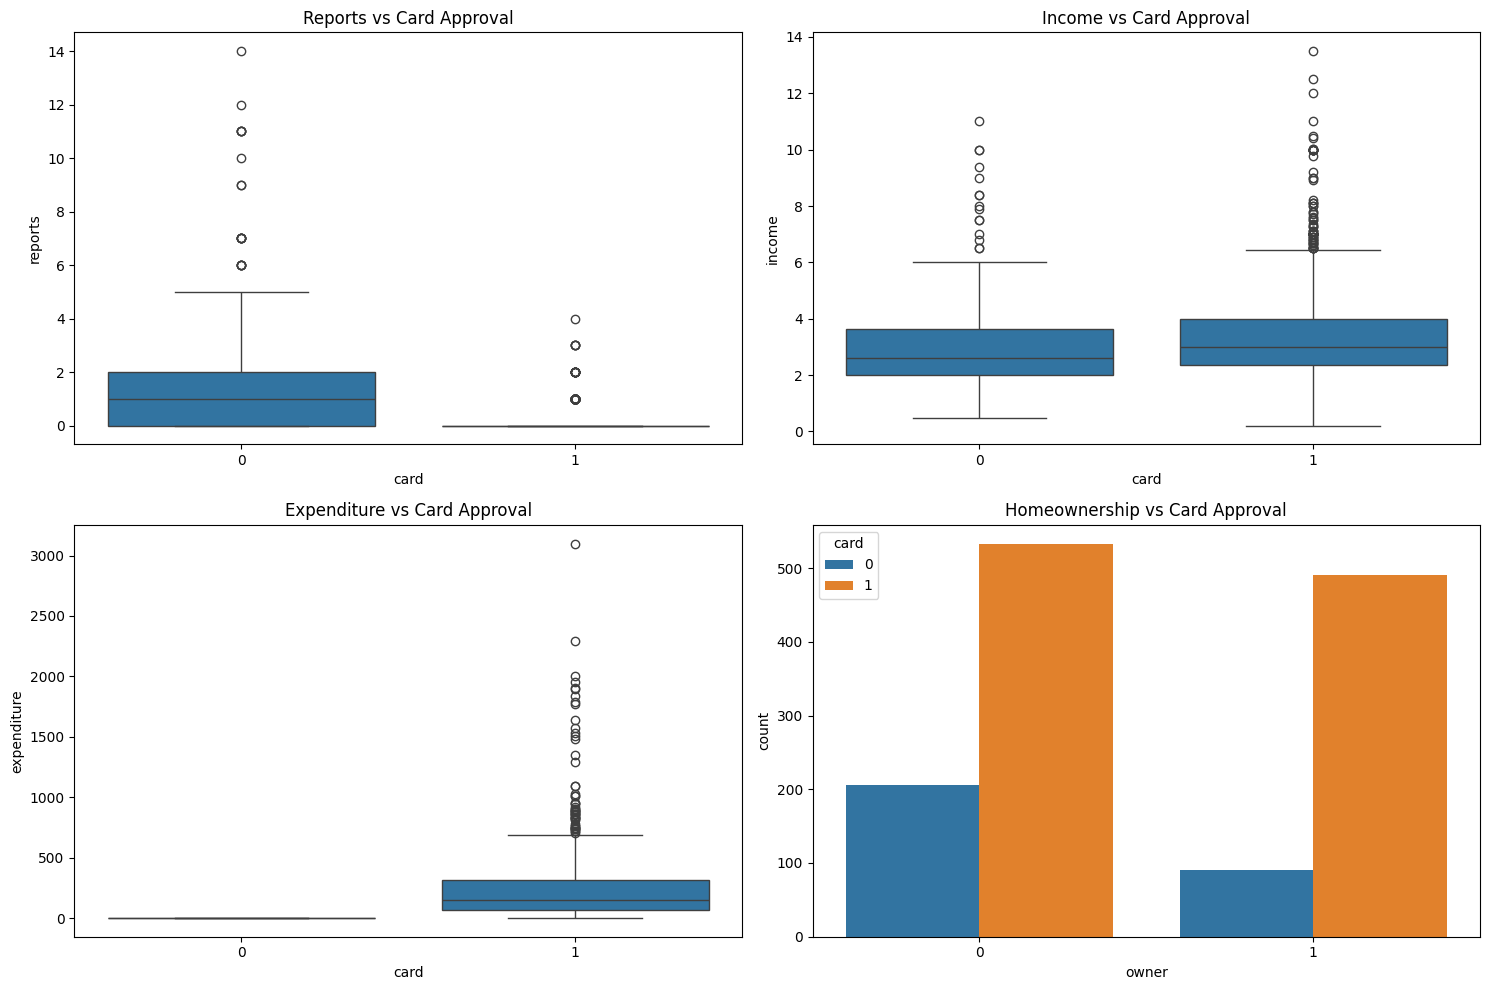

In [ ]:
# Step 3: Exploratory analysis
plt.figure(figsize=(15, 10))

# Number of reports vs Card approval
plt.subplot(2, 2, 1)
sns.boxplot(x='card', y='reports', data=data)
plt.title('Reports vs Card Approval')

# Income vs Card approval
plt.subplot(2, 2, 2)
sns.boxplot(x='card', y='income', data=data)
plt.title('Income vs Card Approval')

# Expenditure vs Card approval
plt.subplot(2, 2, 3)
sns.boxplot(x='card', y='expenditure', data=data)
plt.title('Expenditure vs Card Approval')

# Homeownership vs Card approval
plt.subplot(2, 2, 4)
sns.countplot(x='owner', hue='card', data=data)
plt.title('Homeownership vs Card Approval')

plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Logistic regression model using sklearn
X = data.drop('card', axis=1)
y = data['card']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

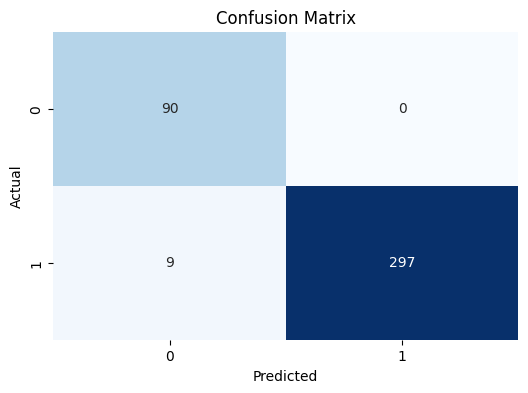

Accuracy: 0.9772727272727273
Recall: 0.9705882352941176
F1 Score: 0.9850746268656716


In [ ]:
# Step 5: Assess the model
y_pred = log_reg.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')